<a href="https://colab.research.google.com/github/ahmadfadhilnugraha/Crankshaft_List/blob/main/Sprint_3_Crankshaft_List.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decoding the Key Factors that Drive Car Sales




## Content

* [**Introduction**](#introduction)
* [**Step 1. Data Review**](#step-1-data-review)
* [**Step 2. Data Transformation**](#step-2-data-transformation)
    * [**2.1. Correcting The Missing Values in The odometer Column**](#21-correcting-the-missing-values-in-the-odometer-column)
    * [**2.2. Correcting The Missing Values in The paint_color Column**](#22-correcting-the-missing-values-in-the-paint_color-column)
    * [**2.3. Correcting The Missing Values in The is_4wd Column**](#23-correcting-the-missing-values-in-the-is_4wd-column)
    * [**2.4. Correcting The Missing Values in The model_year Column**](#24-correcting-the-missing-values-in-the-model_year-column)
    * [**2.5. Correcting The Missing Values in The cylinders Column**](#25-correcting-the-missing-values-in-the-cylinders-column)
    * [**2.6. Brief Summary of Correcting Missing Values**](#26-brief-summary-of-correcting-missing-values)
    * [**2.7. Fixing Data Types**](#27-fixing-data-types)
    * [**2.8. Fixing Data Quality**](#28-fixing-data-quality)
    * [**2.9. Brief Summary of Data Transformation**](#29-brief-summary-of-data-transformation)
* [**Step 3. Exploratory Data Analysis**](#step-3-exploratory-data-analysis)
    * [**3.1. Core Parameter Analysis**](#31-core-parameter-analysis)
    * [**3.2. Studying and Handling Outliers**](#32-studying-and-handling-outliers)
    * [**3.3. Core Parameter Analysis without Outliers**](#33-core-parameter-analysis-without-outliers)
    * [**3.4. Correlation Analysis Between Advertisement Duration and Posting Time**](#34-correlation-analysis-between-advertisement-duration-and-posting-time)
    * [**3.5. Average Price and Advertisement Count for Each Car Model**](#35-average-price-and-advertisement-count-for-each-car-model)
    * [**3.6. Price Factor Analysis**](#36-price-factor-analysis)
        * [**3.6.1. Price Factor Analysis - Sedan**](#361-price-factor-analysis---sedan)
        * [**3.6.2. Price Factor Analysis - SUV**](#362-price-factor-analysis---suv)
* [**Step 4. Conclusion**](#conclusion)


## Introduction

As an analyst at Crankshaft List, where hundreds of free vehicle advertisements are posted on the website daily, the task at hand involves delving into a dataset spanning several years to discern the factors influencing vehicle prices.

## Goals

In this project, the primary goal is to unravel the key determinants of vehicle prices over the past few years. The journey begins with data preprocessing, followed by a meticulous examination of data quality and transformation processes. The project culminates in a comprehensive data analysis, drawing insights from the discoveries made during the data processing stages.

## Steps

The dataset containing information about car advertisement is stored in file /datasets/vehicles_us.csv. This project will consist of few steps:

1. **Data Review:**
   - Examine the quality of the dataset and address any anomalies.
   - Process the data to ensure it aligns with the analytical goals.

2. **Data Transformation:**
   - Apply necessary transformations to enhance the dataset for analysis.

3. **Data Analysis:**
   - Conduct a thorough analysis to uncover trends and patterns in vehicle pricing.

## Step 1. Data Review

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DS/SPRINT_3/vehicles_us.csv')

This dataset contains the following columns:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, and others.
- `odometer` — vehicle mileage when the ad was posted
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — date when the ad was posted
- `days_listed` — number of days the ad was listed before being removed

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [6]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

The dataset reveals discrepancies in data types within the `model_year` and `cylinders` columns, where integer types are expected but float types are present. Similarly, the `is_4wd` column should have boolean data types. Noteworthy missing values are identified in the following columns:

- `model_year`
- `cylinders`
- `odometer`
- `paint_color`
- `is_4wd`

Of these, the `is_4wd` column exhibits the highest number of missing entries, totaling 25,953.

To address these anomalies, the subsequent steps involve rectifying missing values and correcting data types. Furthermore, efforts will be made to augment data quality by incorporating additional information, such as the age of the vehicle when the advertisement was posted.

## Step 2. Data Transformation

For the missing values in the `odometer` and `paint_color` columns, they will be removed as their percentage is relatively small. For the missing values in the `is_4wd` column, they will be replaced with the value 0, which will be converted into a boolean value.

As for the missing values in the `model_year` and `cylinders` columns, they will be replaced with the median value based on each respective model.

In [8]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Check percentage of missing values for every column

In [10]:
df.isnull().mean() * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer         0.000000
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

### Step 2.1. Correcting The Missing Values in The `odometer` Column

I am creating a function to fill missing values in the `odometer` column. Given that the odometer reading is usually directly proportional to the condition of a car, I plan to fill the missing values using the median based on the car's condition. The `condition` column will guide this imputation, ensuring a more context-specific and accurate approach to handling missing odometer data.

In [9]:
odometer_median = df.groupby('condition')['odometer'].median()
df['odometer'] = df.groupby('condition')['odometer'].apply(lambda x: x.fillna(x.median()))
df.head(20)

<ipython-input-9-e8e807659697>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['odometer'] = df.groupby('condition')['odometer'].apply(lambda x: x.fillna(x.median()))


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [11]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer            0
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Step 2.2. Correcting The Missing Values in The `paint_color` Column

We'll address missing values in the 'paint_color' column by assigning them the value 'unknown,' given the lack of available information. This choice allows us to acknowledge the absence of specific color data. Later in our analysis, we'll examine whether any correlations emerge involving these 'unknown' values.

In [12]:
df['paint_color'] = df['paint_color'].fillna(value='unknown')
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Step 2.3. Correcting The Missing Values in The `is_4wd` Column

We will replace missing values in the 'is_4wd' column with 0, assuming that vehicles with missing values are not equipped with 4-wheel drive. This imputation strategy provides a pragmatic solution by considering the absence of specific information as an indication of the absence of 4-wheel drive capability.

In [13]:
df['is_4wd'] = df['is_4wd'].fillna(value=0)
df.isnull().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

### Step 2.4. Correcting The Missing Values in The `model_year` Column

We aim to handle missing values in the `model_year` column by filling them with the median production year corresponding to each car model. This approach assumes that the production years of cars sharing the same model are generally similar or closely related. This strategy ensures a nuanced and model-specific imputation to enhance the overall accuracy of the dataset.

In [14]:
car_year_median = df.groupby('model')['model_year'].median()
df['model_year'] = df.groupby('model')['model_year'].apply(lambda x: x.fillna(x.median()))
df.head(20)

<ipython-input-14-dce675cad6e5>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['model_year'] = df.groupby('model')['model_year'].apply(lambda x: x.fillna(x.median()))


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Step 2.5. Correcting The Missing Values in The `cylinders` Column

Similarly, I will address missing values in the `cylinders` column by imputing them with the median number of cylinders associated with each car model. This assumption rests on the idea that cars of the same model typically share a similar or identical cylinder configuration. By utilizing the median values specific to each car model, we aim to provide a more precise imputation method tailored to the unique characteristics of each model's engine specifications.

In [16]:
cylinders_median = df.groupby('model')['cylinders'].median()
df['cylinders'] = df.groupby('model')['cylinders'].apply(lambda x: x.fillna(x.median()))
df.head(20)

<ipython-input-16-71d493af01aa>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['cylinders'] = df.groupby('model')['cylinders'].apply(lambda x: x.fillna(x.median()))


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Step 2.6. Brief Summary of Correcting Missing Values

In [17]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In the data transformation process below:

1. **Odometer Column:**
   - A function is created to fill missing values in the 'odometer' column based on the median value for each car's condition.

2. **Paint Color Column:**
   - Missing values in the 'paint_color' column are filled with the placeholder 'unknown' to signify the absence of specific color information.

3. **is_4wd Column:**
   - Missing values in the 'is_4wd' column are replaced with 0, assuming that vehicles with missing values do not have 4-wheel drive.

4. **Model_Year Column:**
   - Missing values in the 'model_year' column are filled with the median production year corresponding to each car model, assuming similar production years for the same model.

5. **Cylinders Column:**
   - Missing values in the 'cylinders' column are filled with the median number of cylinders associated with each car model, assuming that cars of the same model share similar cylinder configurations.

These transformations aim to enhance the dataset by imputing missing values in a context-specific manner, considering relevant factors such as condition, paint color, 4-wheel drive status, model year, and cylinder specifications.

### Step 2.7. Fixing Data Types

In [19]:
df['model_year'] = df['model_year'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)
df['odometer'] = df['odometer'].astype(int)
df['is_4wd'] = df['is_4wd'].astype(bool)
df['date_posted'] = pd.to_datetime(df['date_posted'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB


In [20]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


### Step 2.8. Fixing Data Quality

In [23]:
# Add detail information for posting date
df['date_posted_year'] = df['date_posted'].dt.year
df['date_posted_month'] = df['date_posted'].dt.month
df['date_posted_week'] = df['date_posted'].dt.isocalendar().week
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,date_posted_month,date_posted_week
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,25
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,42
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,6
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3,12
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,14


In [24]:
# Add information related with age of the car when it posted
df['model_year'] = pd.to_datetime(df['model_year'], format='%Y').dt.year
df['car_age'] = df['date_posted'].dt.year - df['model_year']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,date_posted_month,date_posted_week,car_age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,25,7
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,42,7
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,6,6
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3,12,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,14,2


In [25]:
# Add average car mileage per year

car_average_yearly = df['odometer'] / df['car_age']
for i in range(len(df)):
    if df.loc[i, 'car_age'] == 0:
        car_average_yearly[i] = df.loc[i, 'odometer']

df['car_average_yearly'] = car_average_yearly

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,date_posted_month,date_posted_week,car_age,car_average_yearly
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,25,7,20714.285714
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,42,7,12672.142857
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,6,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3,12,16,11350.812500
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,14,2,40451.500000


In [28]:
# Changing values in the 'condition' column to something that can be manipulated more easily.
# In this case, i will use dictionary. So car condition will be replaced by number

df['condition'].unique()


array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [29]:
condition_unique_value = {'salvage':0, 'fair':1, 'good':2, 'excellent':3, 'like new':4, 'new':5}

df['condition_id'] = df['condition'].replace(condition_unique_value)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,date_posted_month,date_posted_week,car_age,car_average_yearly,condition_id
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,25,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,42,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,6,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3,12,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,14,2,40451.500000,3


### Step 2.9. Brief Summary of Data Transformation

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          51525 non-null  int64         
 2   model               51525 non-null  object        
 3   condition           51525 non-null  object        
 4   cylinders           51525 non-null  int64         
 5   fuel                51525 non-null  object        
 6   odometer            51525 non-null  int64         
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         51525 non-null  object        
 10  is_4wd              51525 non-null  bool          
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  date_posted_year    51525 non-null  int64     

In [31]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,date_posted_month,date_posted_week,car_age,car_average_yearly,condition_id
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,25,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,42,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,6,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3,12,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,14,2,40451.500000,3


In the data transformation process, targeted adjustments were made to enhance the dataset's quality and usability. The 'odometer' column saw the implementation of a function to fill missing values using the median odometer value specific to each car's condition. This approach provides nuanced imputation considering the condition of each vehicle.

For the 'paint_color' column, a uniform standardization was applied by replacing missing values with the placeholder 'unknown.' This clear indication signifies the absence of specific color information, ensuring consistency in data representation.

In addressing the 'is_4wd' column, missing values were pragmatically substituted with 0, assuming that vehicles without specified values do not have 4-wheel drive. This simplification aids in handling missing data while maintaining a practical assumption.

Further refinements were made to the 'model_year' and 'cylinders' columns. Missing values were imputed with medians based on respective car models, considering similar production years and cylinder configurations. This model-specific approach enhances the accuracy of imputation.

As part of a broader refinement effort, corrections to data types were implemented. 'Model_year' and 'cylinders' were changed to integer types, and 'is_4wd' was changed to boolean. These adjustments contribute to a more accurate, standardized, and readily analyzable dataset, aligning with the goal of improving overall data quality.

## Step 3. Exploratory Data Analysis



### Step 3.1. Core Parameter Analysis

I'll analyze key parameters—Price, Age of the vehicle, Odometer reading, Number of cylinders, and Condition. Special focus will be on how outliers affect the histograms, providing insights into potential anomalies and distribution patterns.

In [32]:
def show_histogram(df, x_parameter, x_bins):
    x_parameter_max = df[x_parameter].max()
    x_parameter_min = df[x_parameter].min()
    plt.hist(df[x_parameter], edgecolor='black', bins=x_bins, range=(x_parameter_min,x_parameter_max))
    plt.ylabel(x_parameter)
    plt.show()



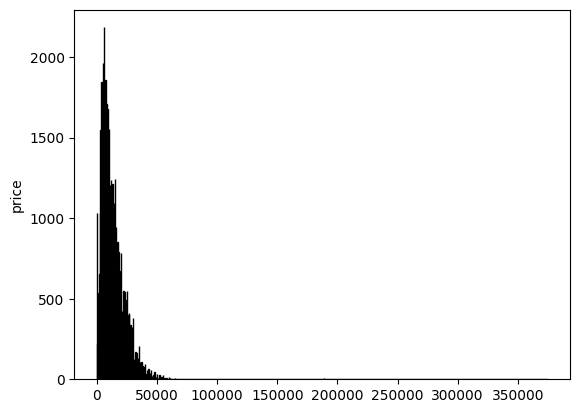

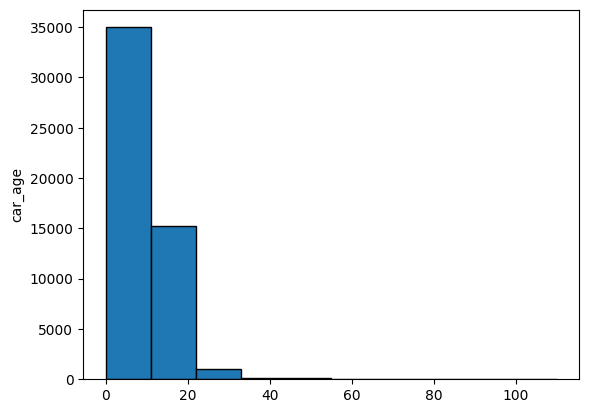

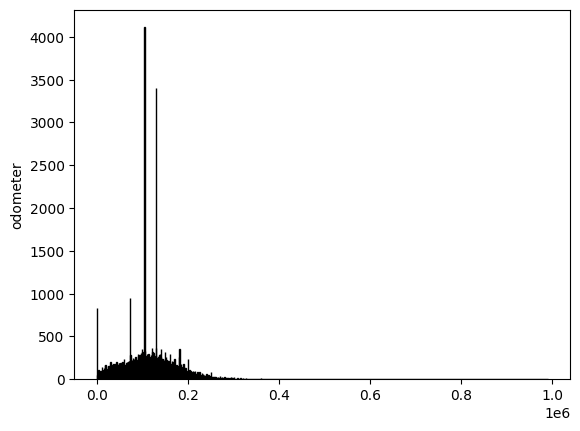

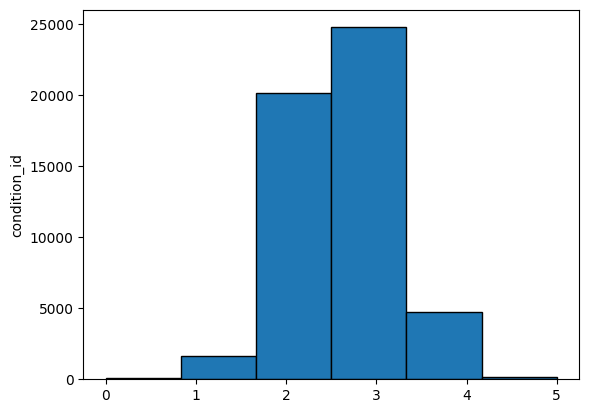

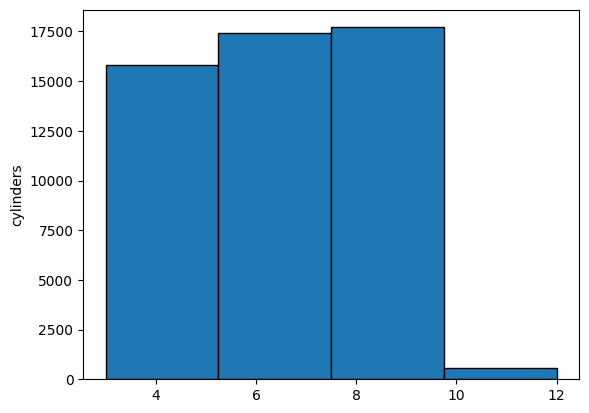

In [33]:
show_histogram(df, 'price',1000)
show_histogram(df, 'car_age',10)
show_histogram(df, 'odometer',1000)
show_histogram(df, 'condition_id',6)
show_histogram(df, 'cylinders',4)



In [34]:
def desc_func(df, value):
    print('description: '+ str(value))
    print(df[value].describe())
    print()

In [35]:
desc_func(df, 'price')
desc_func(df, 'car_age')
desc_func(df, 'odometer')
desc_func(df, 'condition_id')
desc_func(df, 'cylinders')

description: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

description: car_age
count    51525.000000
mean         8.513906
std          6.112976
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64

description: odometer
count     51525.000000
mean     115199.007278
std       60484.868232
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

description: condition_id
count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_id, dtype: float64

description: cylinders
count    51525.000000
mean         6.1210

<Axes: >

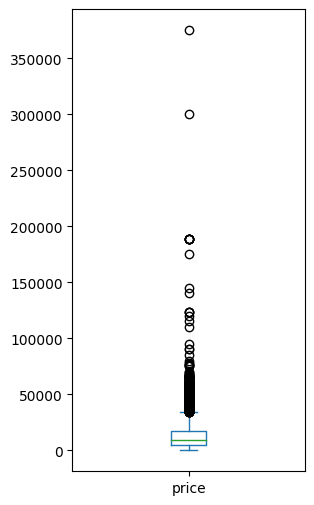

In [36]:
df['price'].plot.box(figsize = (3, 6))




<Axes: >

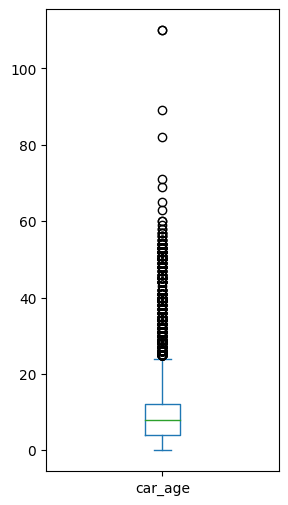

In [37]:
df['car_age'].plot.box(figsize = (3, 6))


<Axes: >

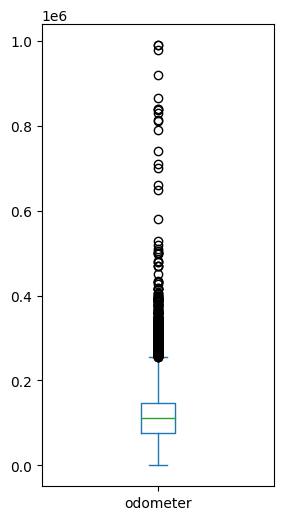

In [38]:
df['odometer'].plot.box(figsize = (3, 6))

In the 'price' column, there are notable outliers. The Q3 value is USD 16,689, but the maximum value reaches USD 375,000. Conversely, the minimum value is USD 0, with Q1 at USD 4,999.

Moving to the 'car_age' column, outliers are evident. The Q3 and Q1 values are 12 years and 4 years, respectively. However, the maximum and minimum values extend to 110 and 0 years.

In the 'odometer' column, Q3 and Q1 values are 155,072 and 70,100, showing a considerable spread from the maximum and minimum values of 990,000 and 0.

Regarding the 'condition_id' and 'cylinders' columns, the value ranges are relatively narrow and appear reasonable.

### Step 3.2. Studying and Handling Outliers


Values exceeding Q3 + 1.5IQR and falling below Q1 - 1.5IQR will be removed as they are considered outliers. The columns affected by this removal are: price, car_age, and odometer.

In [39]:
columns_with_outlier = ['price', 'car_age', 'odometer']
IQR_multiplier = 1.5
outlier_data_upper = []
outlier_data_lower = []

for column in columns_with_outlier:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_upper = Q3 + IQR_multiplier*IQR
    outlier_lower = Q1 - IQR_multiplier*IQR
    column_outliers_upper = df[df[column] > outlier_upper].index
    column_outliers_lower = df[df[column] < outlier_lower].index
    outlier_data_upper.extend(column_outliers_upper)
    outlier_data_lower.extend(column_outliers_lower)


df_wo_outlier_upper = df.drop(outlier_data_upper)
df_wo_outlier = df_wo_outlier_upper.drop(outlier_data_lower)

df_wo_outlier

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,date_posted_month,date_posted_week,car_age,car_average_yearly,condition_id
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,6,25,7,20714.285714,2
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,42,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,6,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019,3,12,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,14,2,40451.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2018,10,40,5,17627.200000,4
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2018,11,46,16,11343.750000,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,2018,11,46,9,14222.222222,3
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,2018,7,27,5,27914.600000,2


### Step 3.3. Core Parameter Analysis without Outliers

In [40]:
def parameter_check(dataset, column, bin_value, y_min, y_max):
    desc = dataset[column].describe()
    dataset[column].plot(kind='hist', bins=bin_value, figsize=(20,10), title=column)
    plt.vlines(x=[desc['25%'], desc['50%'], desc['75%']], ymin=y_min, ymax=y_max, color='red')
    print('Q1: '+ str(desc['25%']))
    print('Median: '+ str(desc['50%']))
    print('Q3: '+ str(desc['75%']))

def boxplot_show(dataset, column):
    dataset[column].plot.box(figsize = (3,6))


Q1: 5000.0
Median: 8995.0
Q3: 15990.0


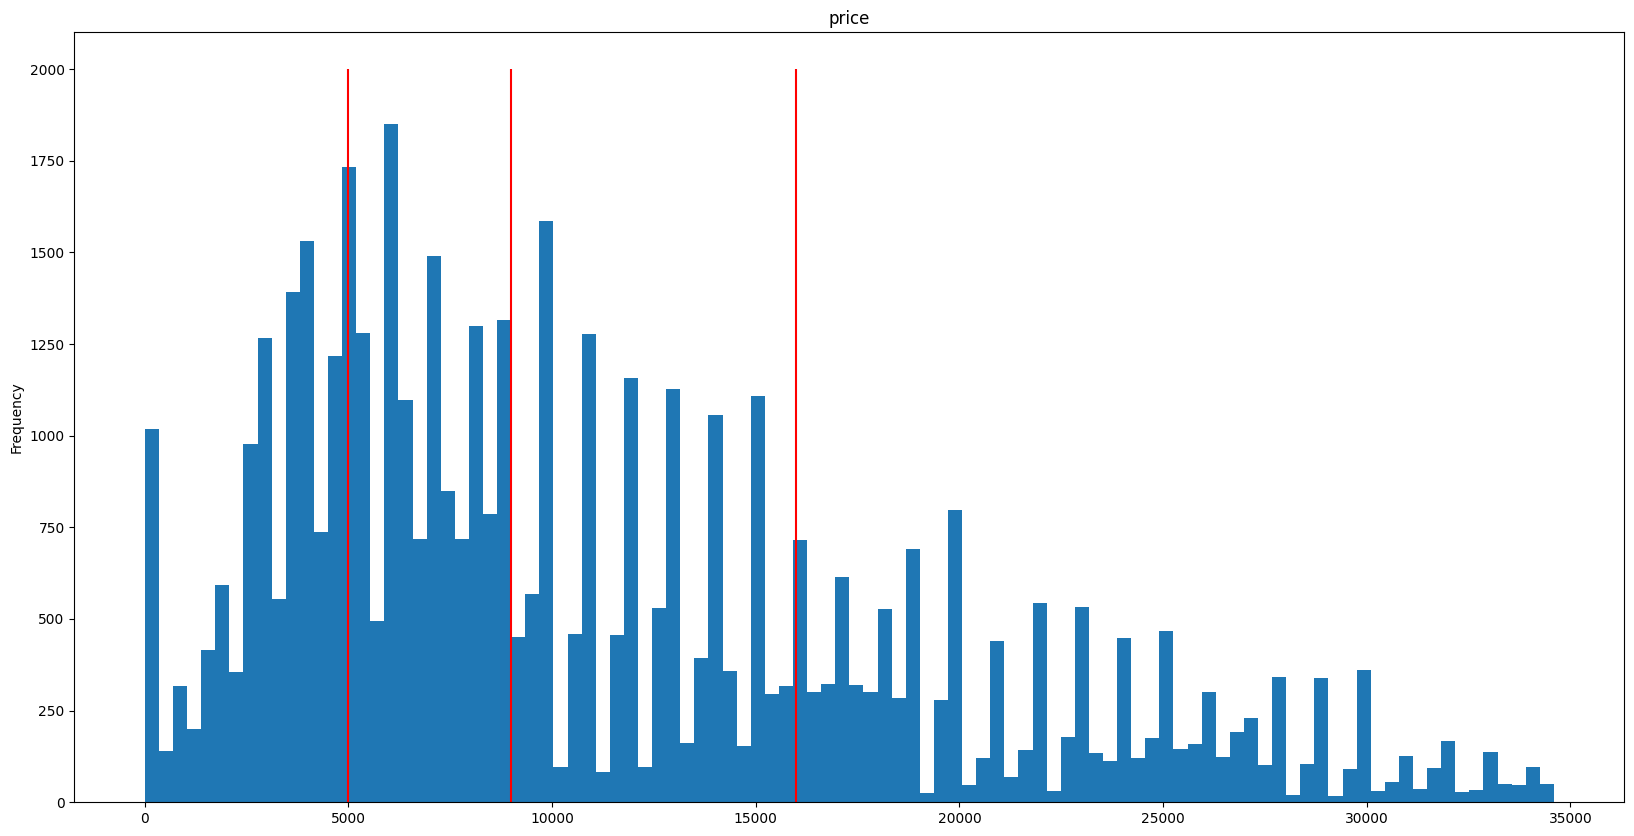

In [41]:
parameter_check(df_wo_outlier, 'price', 100, 0, 2000)


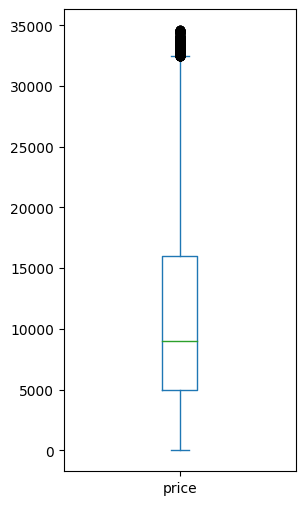

In [42]:
boxplot_show(df_wo_outlier, 'price')

Q1: 4.0
Median: 7.0
Q3: 12.0


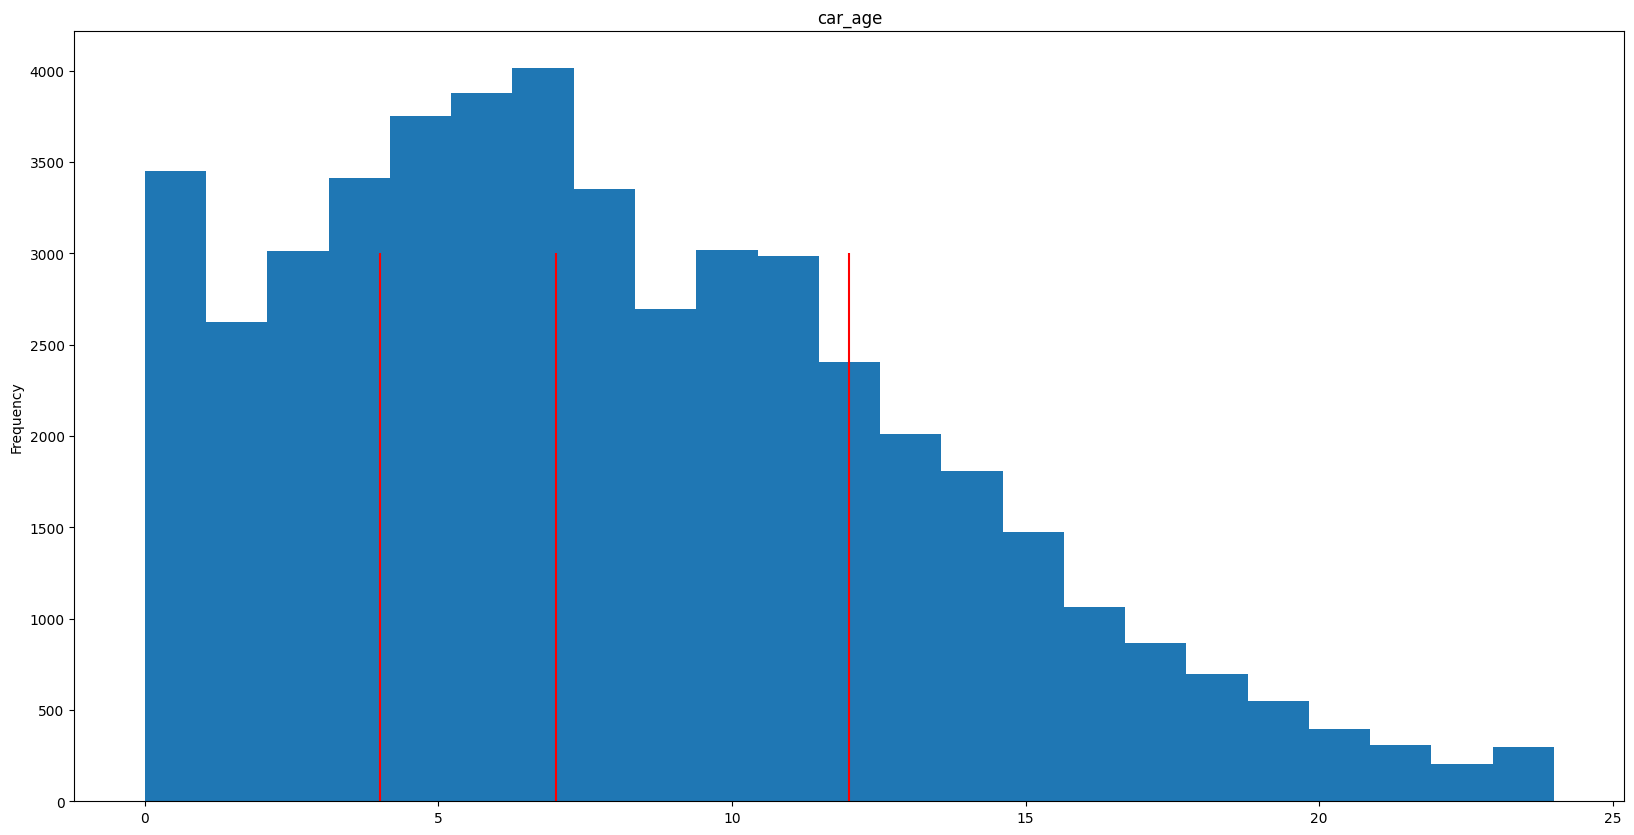

In [43]:
parameter_check(df_wo_outlier, 'car_age', 23, 0, 3000)

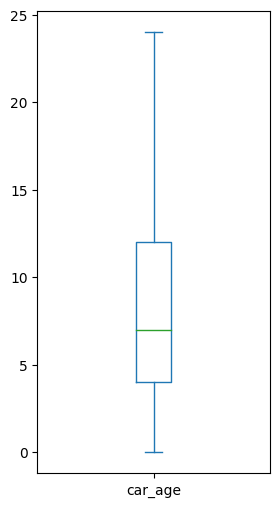

In [44]:
boxplot_show(df_wo_outlier, 'car_age')

Q1: 78669.5
Median: 111939.0
Q3: 146000.0


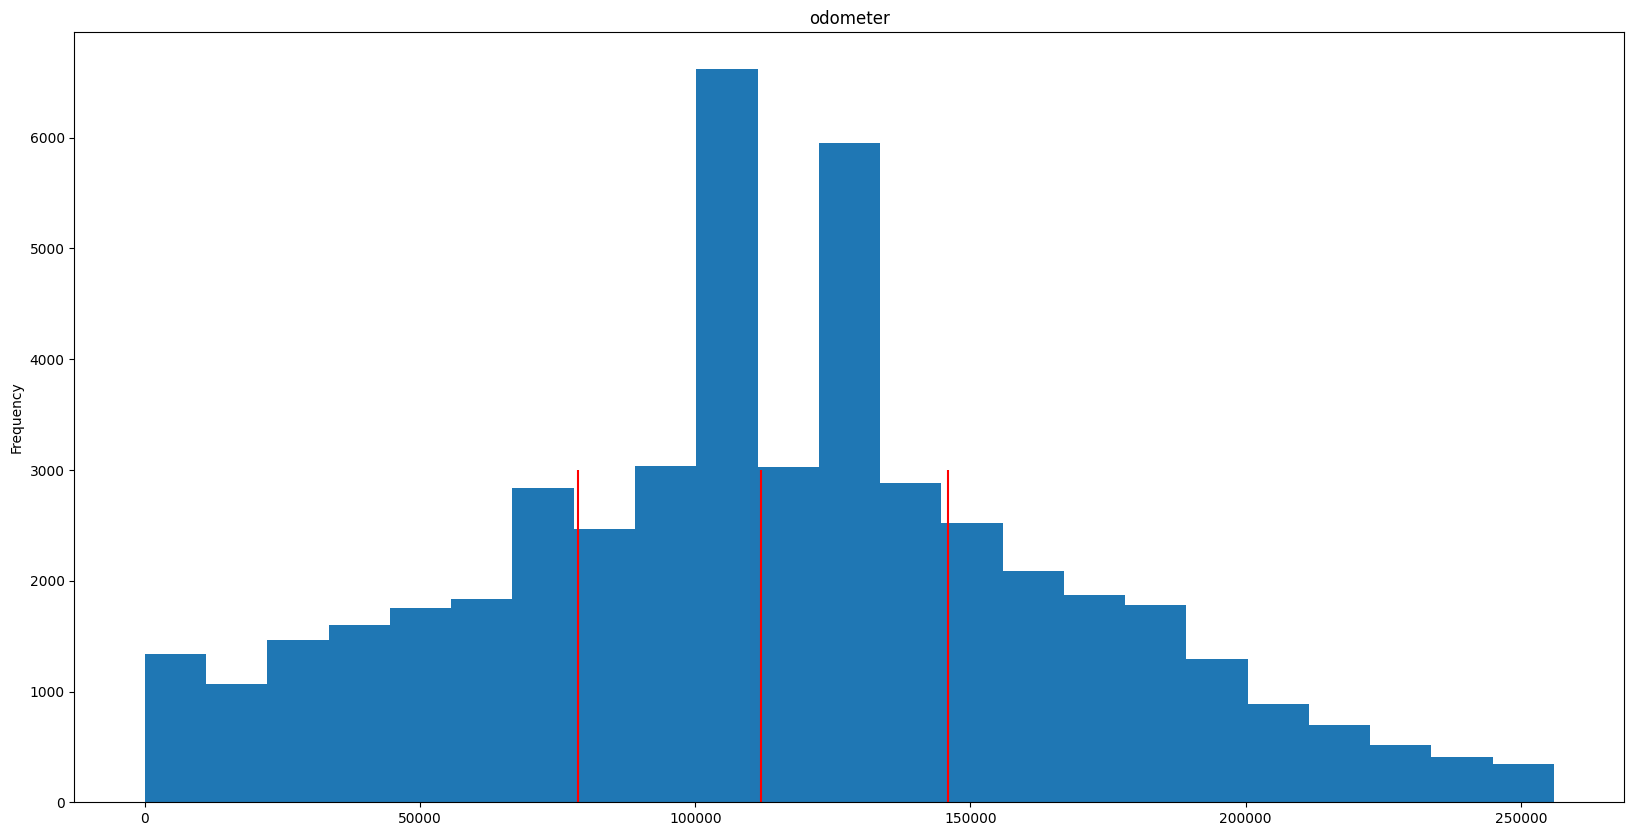

In [45]:
parameter_check(df_wo_outlier, 'odometer', 23, 0, 3000)

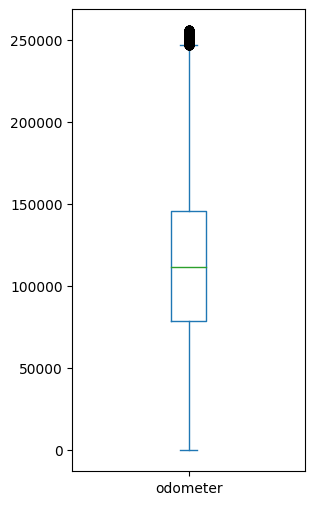

In [46]:
boxplot_show(df_wo_outlier, 'odometer')

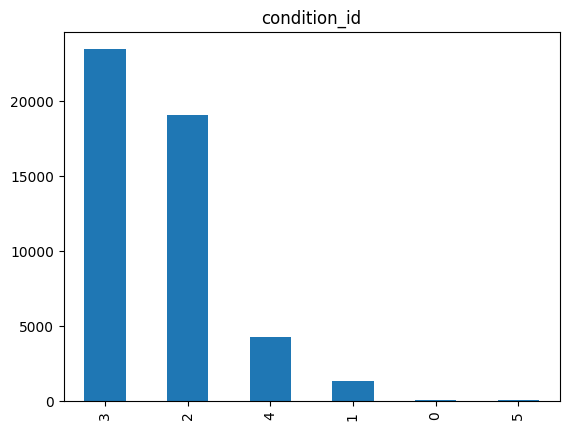

In [47]:
df_wo_outlier_cond_val = df_wo_outlier['condition_id'].value_counts()
df_wo_outlier_cond_val.plot.bar()
plt.title('condition_id')
plt.show()

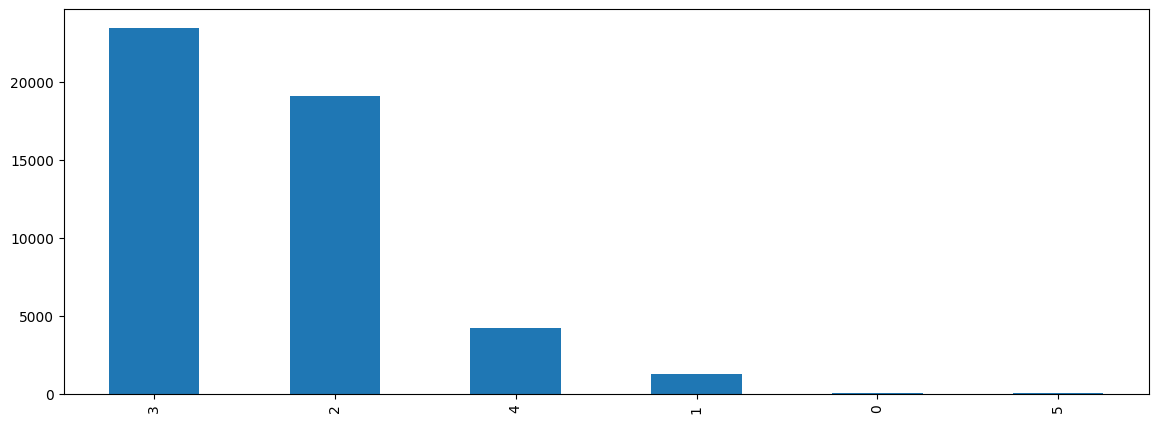

In [48]:
df_wo_outlier['condition_id'].value_counts().plot(kind='bar', figsize=(14,5))
plt.show()

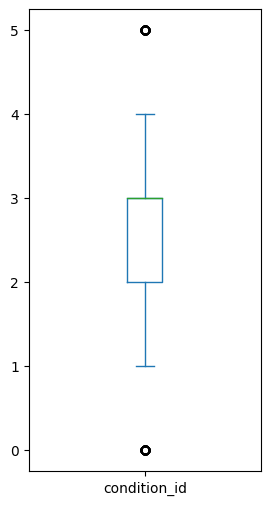

In [49]:
boxplot_show(df_wo_outlier, 'condition_id')

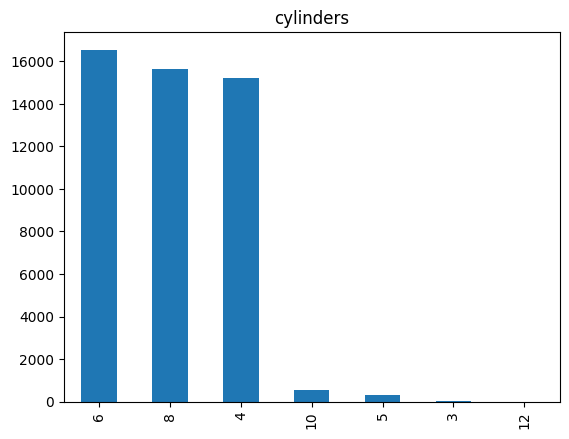

In [50]:
df_wo_outlier_cyl_val = df_wo_outlier['cylinders'].value_counts()
df_wo_outlier_cyl_val.plot.bar()
plt.title('cylinders')
plt.show()

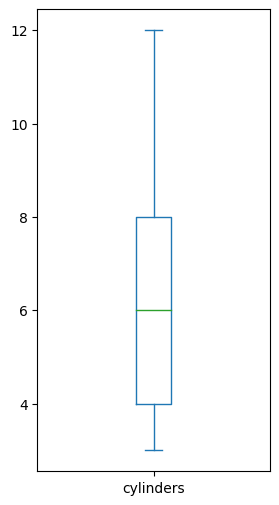

In [51]:
boxplot_show(df_wo_outlier, 'cylinders')

In [52]:
desc_func(df_wo_outlier, 'price')
desc_func(df_wo_outlier, 'car_age')
desc_func(df_wo_outlier, 'odometer')
desc_func(df_wo_outlier, 'condition_id')
desc_func(df_wo_outlier, 'cylinders')

description: price
count    48288.000000
mean     11237.198000
std       7828.319978
min          1.000000
25%       5000.000000
50%       8995.000000
75%      15990.000000
max      34595.000000
Name: price, dtype: float64

description: car_age
count    48288.000000
mean         8.221732
std          5.047407
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         24.000000
Name: car_age, dtype: float64

description: odometer
count     48288.000000
mean     113704.104891
std       53137.272059
min           0.000000
25%       78669.500000
50%      111939.000000
75%      146000.000000
max      256000.000000
Name: odometer, dtype: float64

description: condition_id
count    48288.000000
mean         2.636411
std          0.698265
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_id, dtype: float64

description: cylinders
count    48288.000000
mean         6.053347
std  

After addressing outliers in the dataset, notable changes were observed in the 'price,' 'car_age,' and 'odometer' columns. In the 'price' column, the maximum value decreased from USD 375,000 to USD 34,200, while the 'car_age' column saw a reduction in the maximum value from 100 years to 24 years. Similarly, the 'odometer' column witnessed a decrease in the maximum value from 990,000 to 282,493. It's worth noting that no outlier removal was performed for the 'condition_id' and 'cylinders' columns, as their values were deemed reasonable. Despite the efforts to address outliers, the revised dataset still contains outliers, albeit within a more constrained range of values.

### Step 3.4. Correlation Analysis Between Advertisement Duration and Posting Time

In this step, we will explore the relationship between the duration of advertisements and their posting time.

median: 33.0
mean: 39.54073475811796


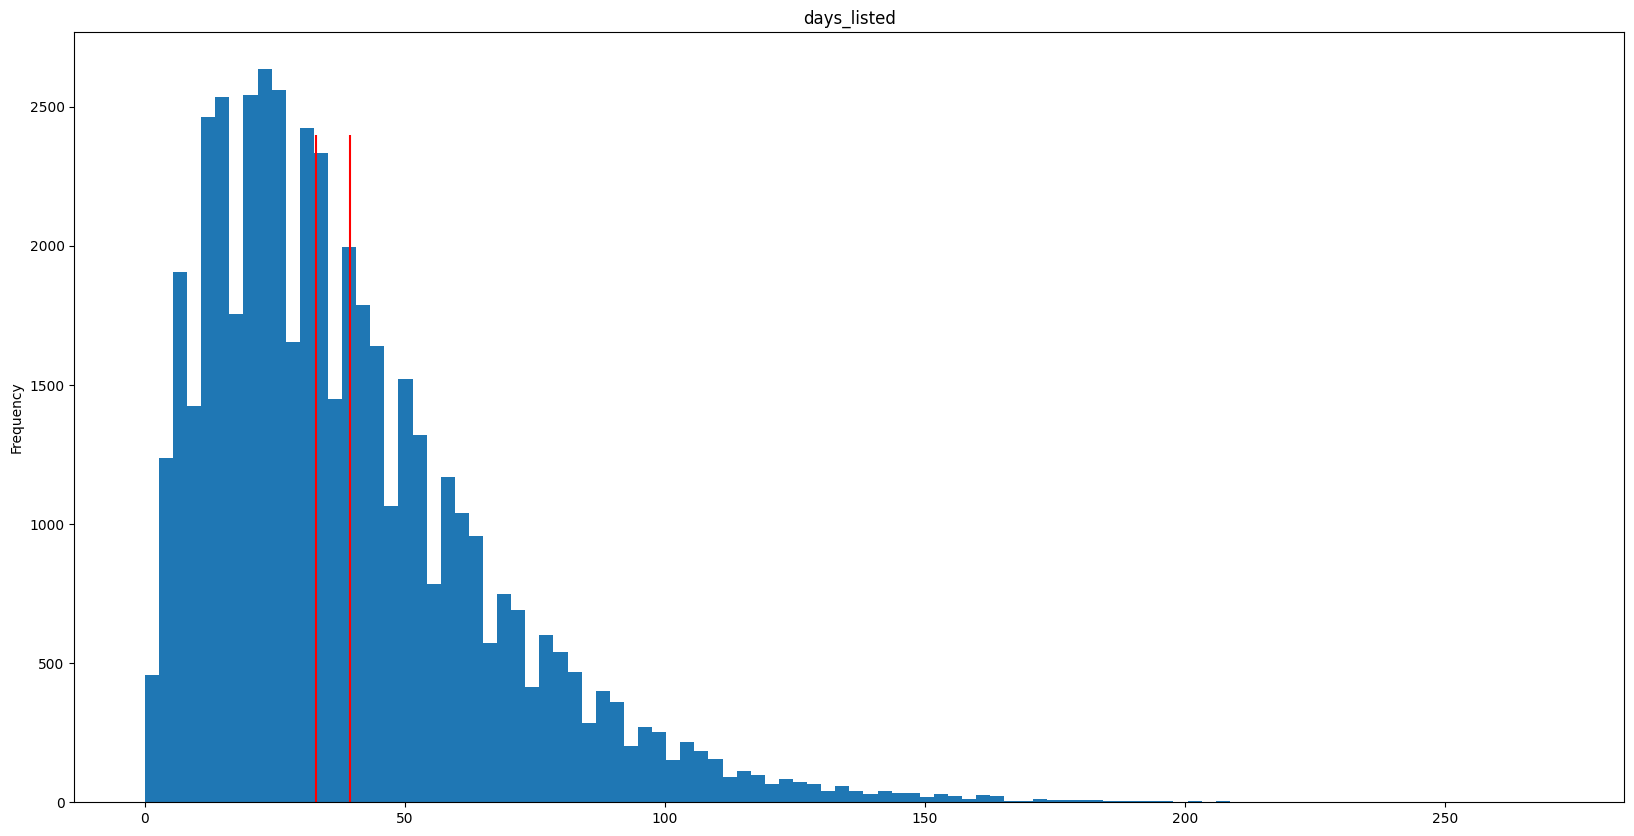

In [53]:
days_listed_desc = df_wo_outlier['days_listed'].describe()

print('median: '+ str(days_listed_desc['50%']))
print('mean: '+ str(days_listed_desc['mean']))

df_wo_outlier['days_listed'].plot(kind='hist', bins=100, figsize=(20,10), title='days_listed')

plt.vlines(x=[days_listed_desc['50%'], days_listed_desc['mean']],
           ymin=0,
           ymax=2400,
           color='red'
          )

plt.show()

In [54]:
year_month_days_listed = df_wo_outlier.pivot_table(
    index=['date_posted_year', 'date_posted_month'],
    values = 'days_listed',
    aggfunc=['median', 'mean'])

year_month_days_listed.columns = ['median', 'mean']
year_month_days_listed

median       mean
date_posted_year date_posted_month                   
2018             5                      34  39.706770
                 6                      34  39.539980
                 7                      33  39.303716
                 8                      33  38.989962
                 9                      33  39.678213
                 10                     33  38.894810
                 11                     33  39.595429
                 12                     33  38.905554
2019             1                      33  39.440824
                 2                      34  40.845681
                 3                      33  39.886156
                 4                      34  40.061930

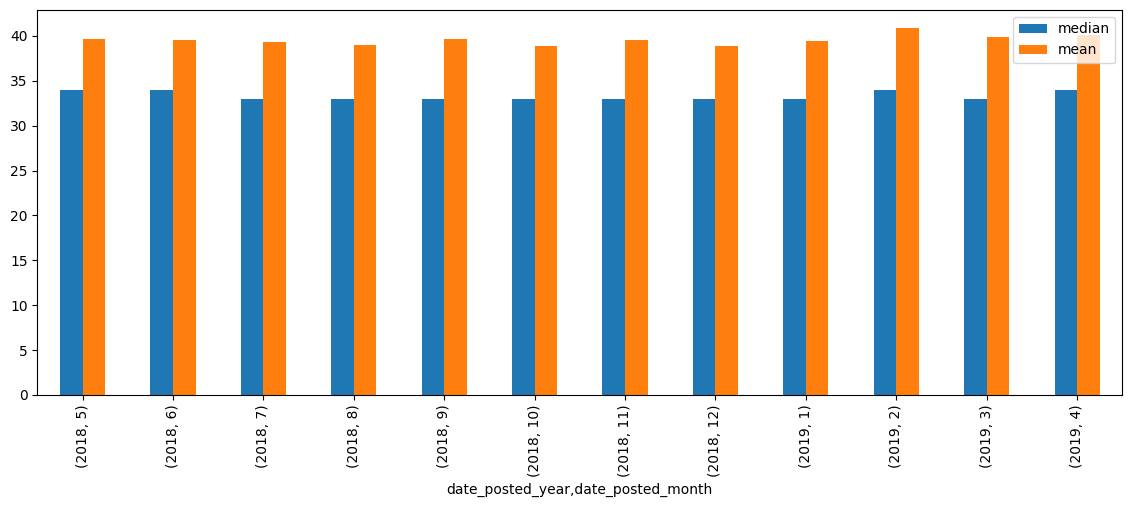

In [55]:
year_month_days_listed.plot(kind='bar', figsize=(14,5))
plt.show()

As observed in the above histogram, the mean value is higher than the median. This discrepancy is attributed to the presence of a few cars being advertised for a significantly longer duration than the typical posting period.

Upon grouping the advertisement durations based on the month and year of posting, there is minimal variance in both the median and mean values for each group. This suggests that there is no discernible correlation between the posting time of an ad and its duration.

### Step 3.5. Average Price and Advertisement Count for Each Car Model

This section focuses on identifying the average price and the number of advertisements for each car model.

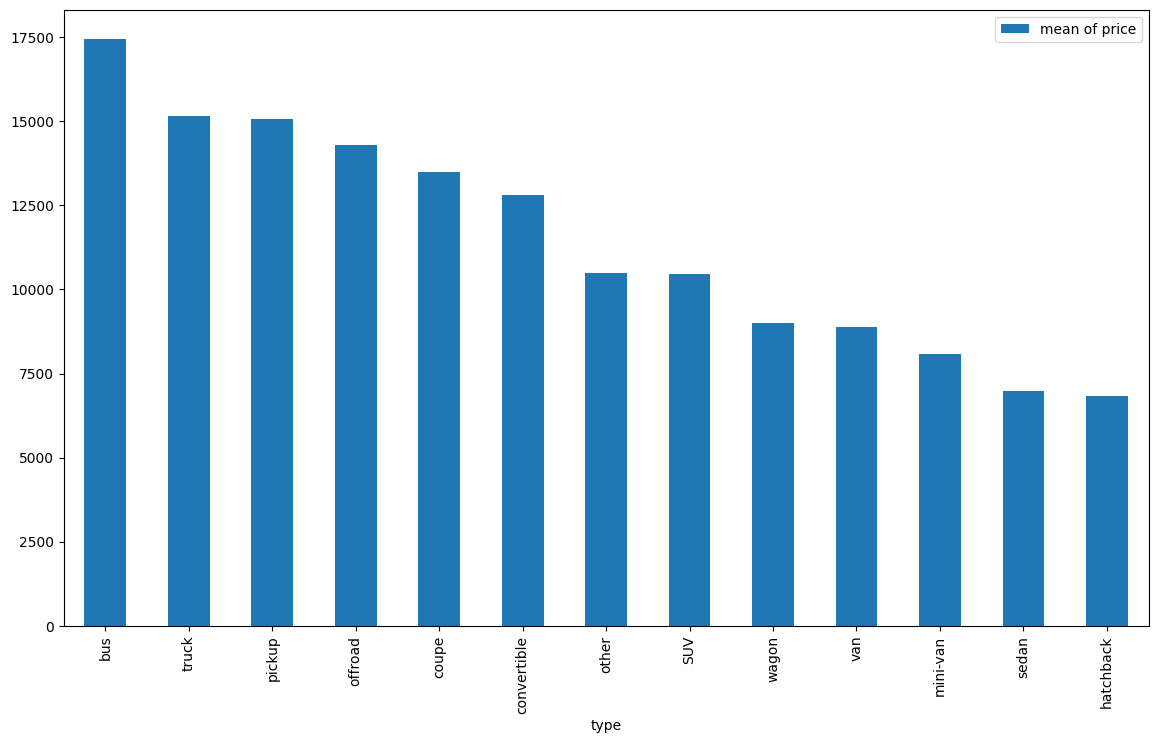

In [56]:
price_by_type = df_wo_outlier.pivot_table(
    index='type',
    values='price',
    aggfunc='mean')

price_by_type.columns = ['mean of price']

price_by_type.sort_values('mean of price', ascending=False).plot(kind='bar', figsize=(14,8))
plt.show()

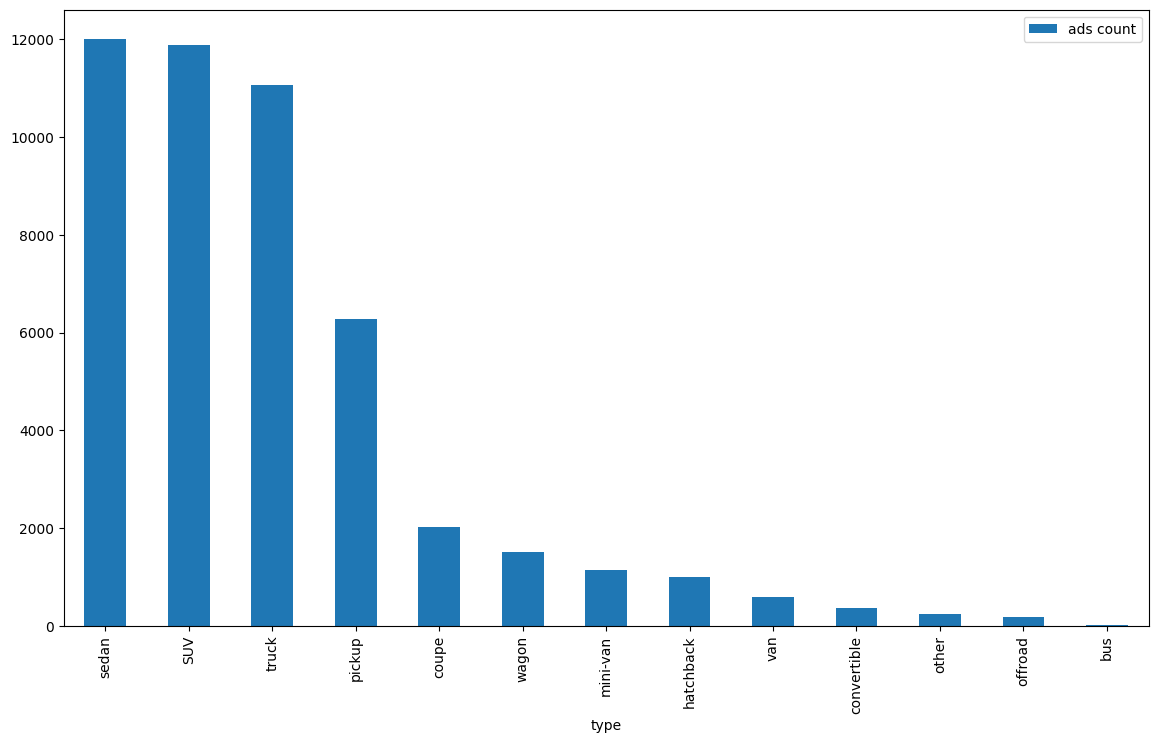

In [57]:
ads_by_type = df_wo_outlier.pivot_table(
    index='type',
    values='price',
    aggfunc='count')

ads_by_type.columns = ['ads count']

ads_by_type.sort_values('ads count', ascending=False).plot(kind='bar', figsize=(14,8))
plt.show()

The histogram depicting average prices across various car types reveals that the highest average prices are associated with Bus, Truck, and Pickup vehicles. On the contrary, the group with the lowest average prices includes hatchback cars.

As for advertisement frequency, sedans and SUVs emerge as the most prominently featured types, while off-road and bus categories exhibit the lowest prevalence in advertising.

### Step 3.6. Price Factor Analysis

Based on the data regarding the number of advertisements per group of car types, two types of cars with the highest number of ads, namely sedans and SUVs, can be selected as samples for analysis.

#### Step 3.6.1. Price Factor Analysis - Sedan

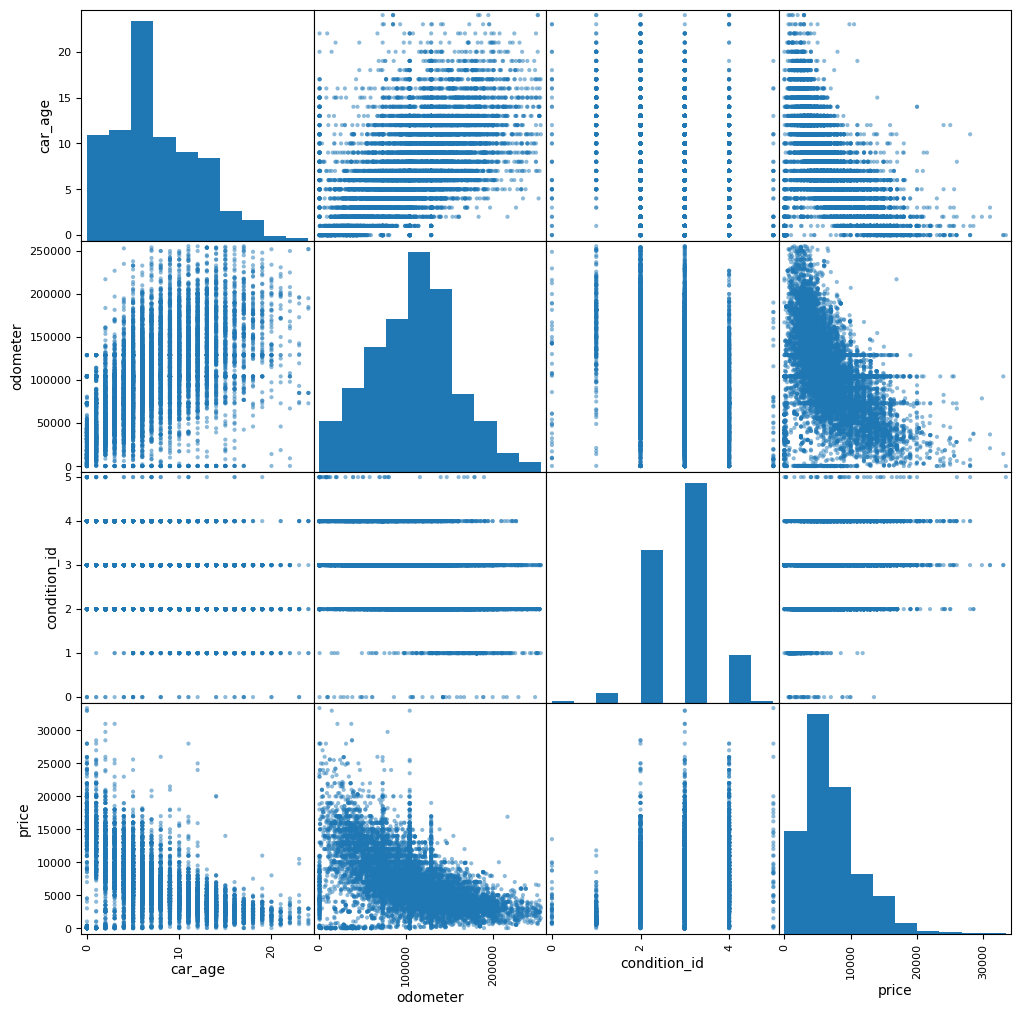

               car_age  odometer  condition_id     price
car_age       1.000000  0.548034     -0.294522 -0.614406
odometer      0.548034  1.000000     -0.366763 -0.524775
condition_id -0.294522 -0.366763      1.000000  0.291830
price        -0.614406 -0.524775      0.291830  1.000000


<ipython-input-58-0d2d7cb24dd7>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_wo_outlier_sedan_scat.corr())


In [58]:
df_wo_outlier_sedan = df_wo_outlier.loc[df_wo_outlier['type'] == 'sedan'].copy()
df_wo_outlier_sedan_scat = df_wo_outlier_sedan.loc[df_wo_outlier_sedan['odometer'] > 0, ['type', 'car_age', 'odometer', 'condition_id', 'price']]
df_wo_outlier_sedan_cat = df_wo_outlier_sedan.loc[(df_wo_outlier_sedan['paint_color'] != 'unknown') & (df_wo_outlier_sedan['transmission'] != 'other'), ['transmission', 'paint_color', 'price']]

pd.plotting.scatter_matrix(df_wo_outlier_sedan_scat, figsize = (12,12))
plt.show()
print(df_wo_outlier_sedan_scat.corr())

From the correlation matrix, it can be observed that there is a negative correlation between price and car_age as well as odometer in sedan cars. This implies that as the age and mileage of the car increase, the price tends to decrease.

Unfortunately, the condition_id factor does not exhibit a strong correlation with price. In the correlation plot, sedans with conditions 2 to 5 tend to have higher prices compared to conditions 0 to 1. However, the correlation is not particularly strong, as there are still many sedans with conditions 2 to 5 that have lower prices.

In [59]:
print('Number of advertisements based on transmission:')
print(df_wo_outlier_sedan_cat['transmission'].value_counts())
print()
print('Number of advertisements based on paint color:')
print(df_wo_outlier_sedan_cat['paint_color'].value_counts())

Number of advertisements based on transmission:
automatic    9272
manual        465
Name: transmission, dtype: int64

Number of advertisements based on paint color:
silver    2018
black     1747
grey      1603
white     1475
blue      1209
red        913
custom     267
brown      254
green      201
purple      22
yellow      20
orange       8
Name: paint_color, dtype: int64


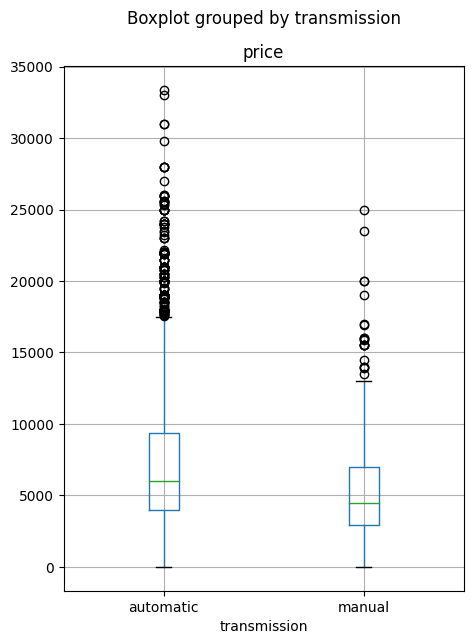

,Sedan price mean
transmission,
automatic,7100.554034
manual,5387.610753


In [60]:
df_wo_outlier_sedan_cat.boxplot(column='price', by='transmission', figsize=(5,7))
plt.show()

sedan_mean = df_wo_outlier_sedan_cat.pivot_table(index='transmission', values='price', aggfunc='mean')
sedan_mean.columns = ['Sedan price mean']
sedan_mean

In [61]:
df_wo_outlier_sedan_cat = df_wo_outlier_sedan_cat.loc[(df_wo_outlier_sedan_cat['paint_color'] != 'purple') & (df_wo_outlier_sedan_cat['paint_color'] != 'yellow')]
df_wo_outlier_sedan_cat =  df_wo_outlier_sedan_cat.loc[(df_wo_outlier_sedan_cat['paint_color'] != 'orange')]
df_wo_outlier_sedan_cat['paint_color'].value_counts()

silver    2018
black     1747
grey      1603
white     1475
blue      1209
red        913
custom     267
brown      254
green      201
Name: paint_color, dtype: int64

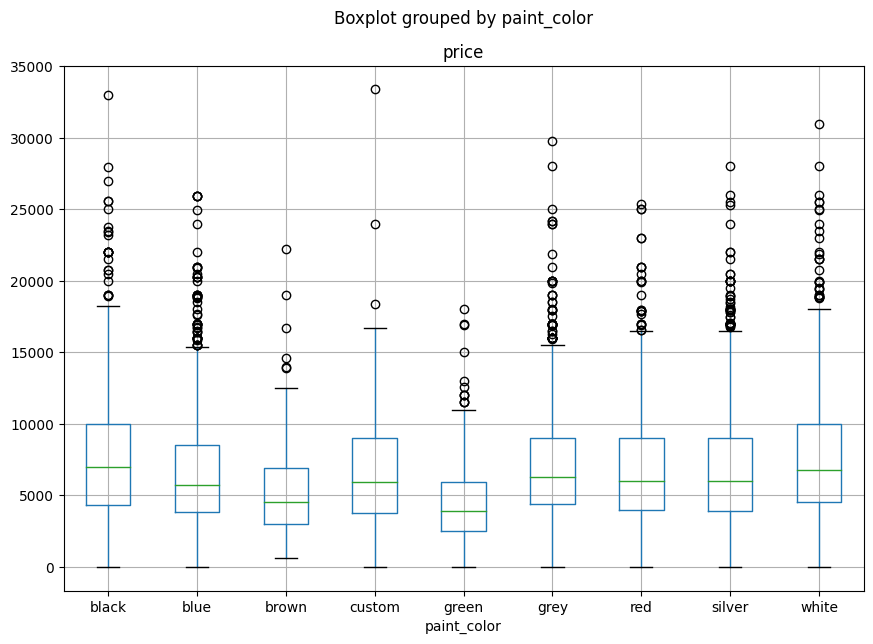

In [62]:
df_wo_outlier_sedan_cat.boxplot(column='price', by='paint_color', figsize=(10,7))
plt.show()

In the provided insights, we observe a higher prevalence of advertisements for sedans with automatic transmission compared to manual. Furthermore, there is a discernible trend indicating that sedans featuring automatic transmission are generally priced higher than their manual counterparts.

Shifting attention to the boxplot illustrating the correlation between sedan color and pricing, it becomes apparent that black and white sedans command higher prices than those with alternative colors. Despite this pricing trend, the dominant colors in the sedan market are silver(1), black(2), and gray(3).

#### Step 3.6.2. Price Factor Analysis - SUV

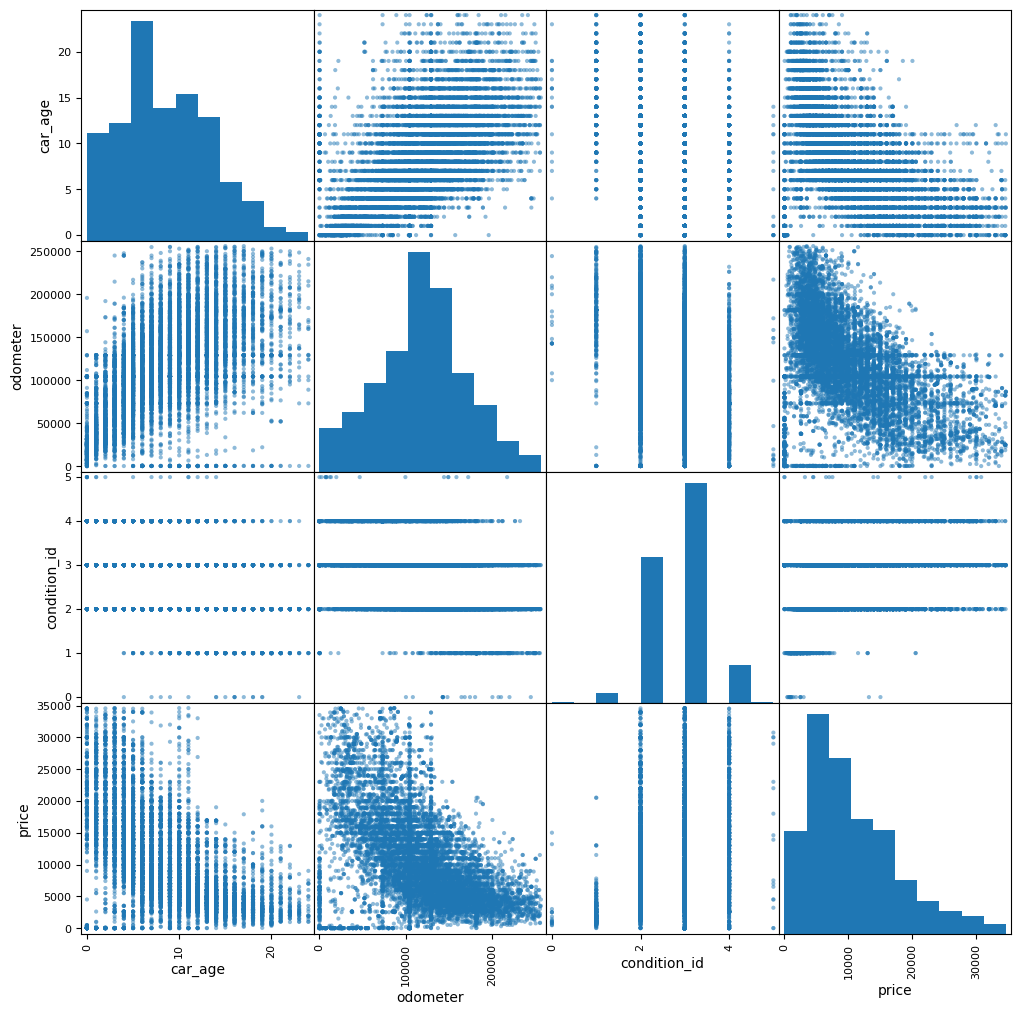

               car_age  odometer  condition_id     price
car_age       1.000000  0.548034     -0.294522 -0.614406
odometer      0.548034  1.000000     -0.366763 -0.524775
condition_id -0.294522 -0.366763      1.000000  0.291830
price        -0.614406 -0.524775      0.291830  1.000000


<ipython-input-63-926826240e8d>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_wo_outlier_sedan_scat.corr())


In [63]:
df_wo_outlier_suv =df_wo_outlier.loc[df_wo_outlier['type'] == 'SUV'].copy()
df_wo_outlier_suv_scat = df_wo_outlier_suv.loc[df_wo_outlier_suv['odometer'] > 0, ['type', 'car_age', 'odometer', 'condition_id', 'price']]
df_wo_outlier_suv_cat = df_wo_outlier_suv.loc[(df_wo_outlier_suv['paint_color'] != 'unknown') & (df_wo_outlier_suv['transmission'] != 'other'), ['transmission', 'paint_color', 'price']]

pd.plotting.scatter_matrix(df_wo_outlier_suv_scat, figsize = (12,12))
plt.show()
print(df_wo_outlier_sedan_scat.corr())

What happens with SUVs is roughly similar to what occurs with sedans. There is a negative correlation between price and car_age as well as odometer in SUVs. This implies that as the age and mileage of the SUV increase, the price tends to decrease.

Unfortunately, the condition factor does not exhibit a strong correlation with the price of SUVs. In the correlation plot, SUVs with conditions 2 to 5 tend to have higher prices compared to conditions 0 to 1. However, the correlation is not particularly strong, as there are still many SUVs with conditions 2 to 5 that have lower prices.

In [64]:
print('Number of SUV advertisements based on transmission:')
print(df_wo_outlier_suv_cat['transmission'].value_counts())
print()
print('Number of SUV advertisements based on paint color:')
print(df_wo_outlier_suv_cat['paint_color'].value_counts())

Number of SUV advertisements based on transmission:
automatic    9244
manual        369
Name: transmission, dtype: int64

Number of SUV advertisements based on paint color:
black     2047
white     1843
silver    1518
grey      1138
blue       997
red        865
green      409
brown      349
custom     284
orange      80
yellow      45
purple      38
Name: paint_color, dtype: int64


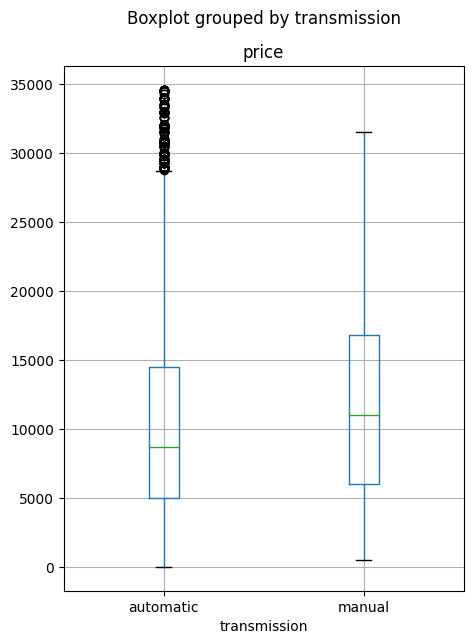

,SUV price mean
transmission,
automatic,10448.933903
manual,11760.284553


In [65]:
df_wo_outlier_suv_cat.boxplot(column='price', by='transmission', figsize=(5,7))
plt.show()

suv_mean = df_wo_outlier_suv_cat.pivot_table(index='transmission', values='price', aggfunc='mean')
suv_mean.columns = ['SUV price mean']
suv_mean

In [66]:
df_wo_outlier_suv_cat = df_wo_outlier_suv_cat.loc[(df_wo_outlier_suv_cat['paint_color'] != 'yellow') & (df_wo_outlier_suv_cat['paint_color'] != 'purple')]
df_wo_outlier_suv_cat['paint_color'].value_counts()

black     2047
white     1843
silver    1518
grey      1138
blue       997
red        865
green      409
brown      349
custom     284
orange      80
Name: paint_color, dtype: int64

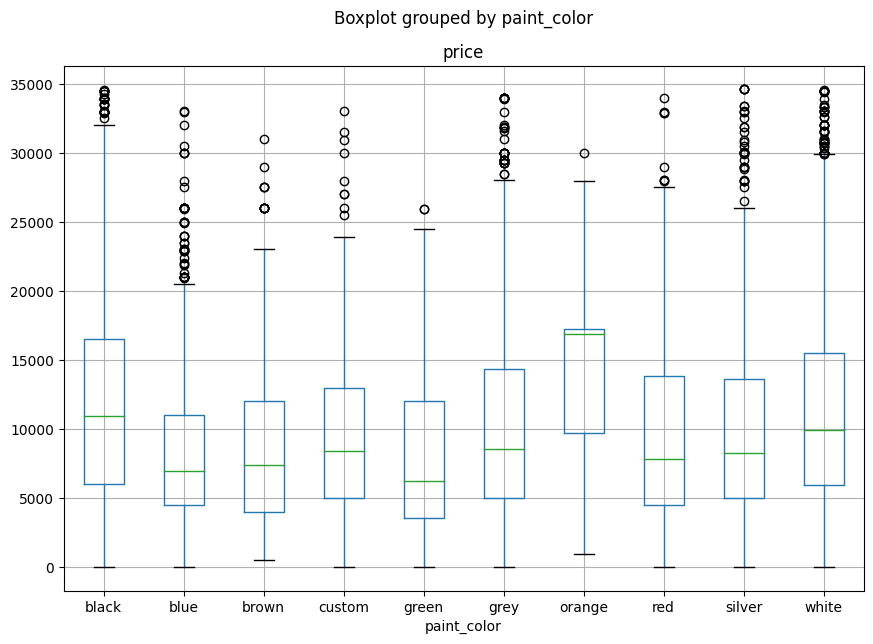

In [67]:
df_wo_outlier_suv_cat.boxplot(column='price', by='paint_color', figsize=(10,7))
plt.show()

In the above explanation, it is evident that advertisements for SUVs are predominantly for those with automatic transmission. However, when considering the pricing, SUVs with manual transmission appear to be more expensive than their automatic counterparts.

As for SUVs, the most commonly advertised colors are black and white. Interestingly, SUVs with the highest prices often come in orange, despite not being as frequently advertised.

## Step 4. Conclusion


Before delving into the analysis of available data, a comprehensive data preprocessing phase was executed. This involved addressing missing values, handling duplicate entries, and managing outliers to ensure the integrity of the dataset. Subsequently, an exploration of factors influencing car prices was conducted, revealing insights into the impact of vehicle type, color, transmission, age, and mileage. Each aspect is detailed below:

1. **Data Preprocessing:**
   - **Handling Missing Values:**
     - Identified and addressed missing values in the dataset to enhance data completeness.
   - **Duplicate Data:**
     - Checked for and removed duplicate entries to ensure accurate analysis.
   - **Outlier Treatment:**
     - Detected and managed outliers using removal or adjustment strategies based on their nature and impact.

2. **Factors Influencing Car Prices:**
   - **Vehicle Type:**
     - Larger vehicles like buses, trucks, and pickups exhibit the highest average selling prices, likely due to their size and utility.
     - Luxury cars such as coupes and convertibles follow with competitive pricing, reflecting their premium features.
     - Hatchback cars, in contrast, tend to have the lowest average prices, possibly due to their compact design and general affordability.

   - **Color of the Car:**
     - White and black cars are more prevalent and command higher prices, suggesting a preference for classic and neutral colors in the market.
     - Notably, SUVs in the color orange hold a higher value, indicating a potential market preference for distinctive colors in this vehicle category.

   - **Transmission Type:**
     - In city cars like sedans, manual transmission variants are priced lower than automatic counterparts, reflecting consumer preferences and demand.
     - This trend does not hold for SUVs, where manual transmission variants tend to be more expensive than automatic ones. The reasoning behind this could be explored further.

   - **Age and Mileage:**
     - The age and mileage of a car are inversely proportional to its price, suggesting that older cars with higher mileage generally have lower market value.
     - This aligns with the expected higher maintenance costs associated with older cars, influencing pricing decisions in the used car market.